In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Icecream sales prediction.csv")
data.head(5)

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,No
1,75.2,1.0,86.4,85,No
2,86.0,2.0,99.2,107,No
3,75.2,2.0,72.4,71,Yes
4,60.8,2.0,71.2,65,Yes


/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_23127/2666183384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Did it rain on that day?", data=data, palette=["#2E8B57", "#87CEEB"])


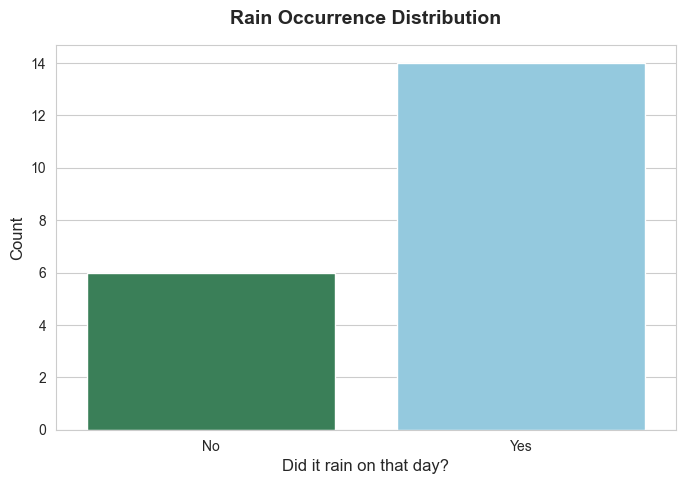

In [3]:
sns.set_style("whitegrid") 
sns.set_palette("pastel") 
plt.figure(figsize=(8, 5)) 
ax = sns.countplot(x="Did it rain on that day?", data=data, palette=["#2E8B57", "#87CEEB"])  
ax.set_title("Rain Occurrence Distribution", fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel("Did it rain on that day?", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [4]:
data["Did it rain on that day?"]=data["Did it rain on that day?"].replace({"Yes":1,"No":0})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_23127/1560138870.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Did it rain on that day?"]=data["Did it rain on that day?"].replace({"Yes":1,"No":0})


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (F)                 20 non-null     float64
 1   Ice-cream Price ($)             20 non-null     float64
 2   Number of Tourists (thousands)  20 non-null     float64
 3   Ice Cream Sales ($,thousands)   20 non-null     int64  
 4   Did it rain on that day?        20 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 932.0 bytes


In [6]:
data.describe()

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,73.130000,1.362500,78.955000,76.850000,0.700000
std,7.598137,0.496534,10.992556,13.259654,0.470162
min,60.800000,0.750000,52.100000,53.000000,0.000000
25%,67.550000,1.000000,71.175000,66.750000,0.000000
50%,75.200000,1.375000,76.600000,74.000000,1.000000
75%,78.800000,2.000000,88.025000,85.750000,1.000000
max,86.000000,2.000000,99.200000,107.000000,1.000000


In [7]:
data.isnull().sum()

Temperature (F)                   0
Ice-cream Price ($)               0
Number of Tourists (thousands)    0
Ice Cream Sales ($,thousands)     0
Did it rain on that day?          0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.corr()

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
Temperature (F),1.000000,0.039864,0.779084,0.862798,-0.660333
Ice-cream Price ($),0.039864,1.000000,0.045092,0.094629,-0.129634
Number of Tourists (thousands),0.779084,0.045092,1.000000,0.933405,-0.675883
"Ice Cream Sales ($,thousands)",0.862798,0.094629,0.933405,1.000000,-0.750530
Did it rain on that day?,-0.660333,-0.129634,-0.675883,-0.750530,1.000000


# EDA

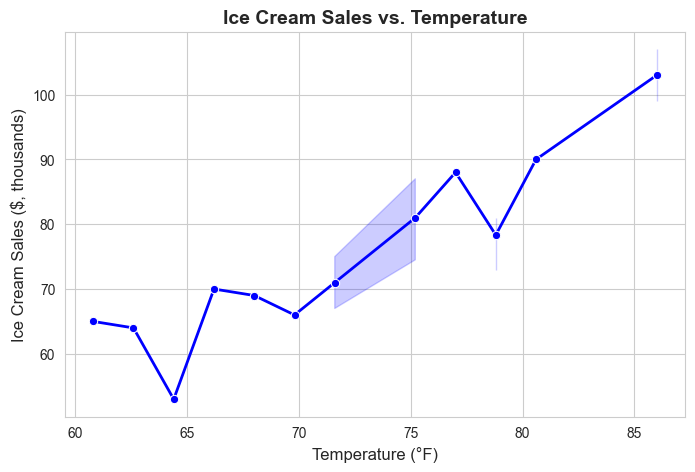

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.lineplot(x=data["Temperature (F)"], y=data["Ice Cream Sales ($,thousands)"], marker="o", color="blue", linewidth=2)
plt.xlabel("Temperature (°F)", fontsize=12)
plt.ylabel("Ice Cream Sales ($, thousands)", fontsize=12)
plt.title("Ice Cream Sales vs. Temperature", fontsize=14, fontweight='bold')
plt.show()

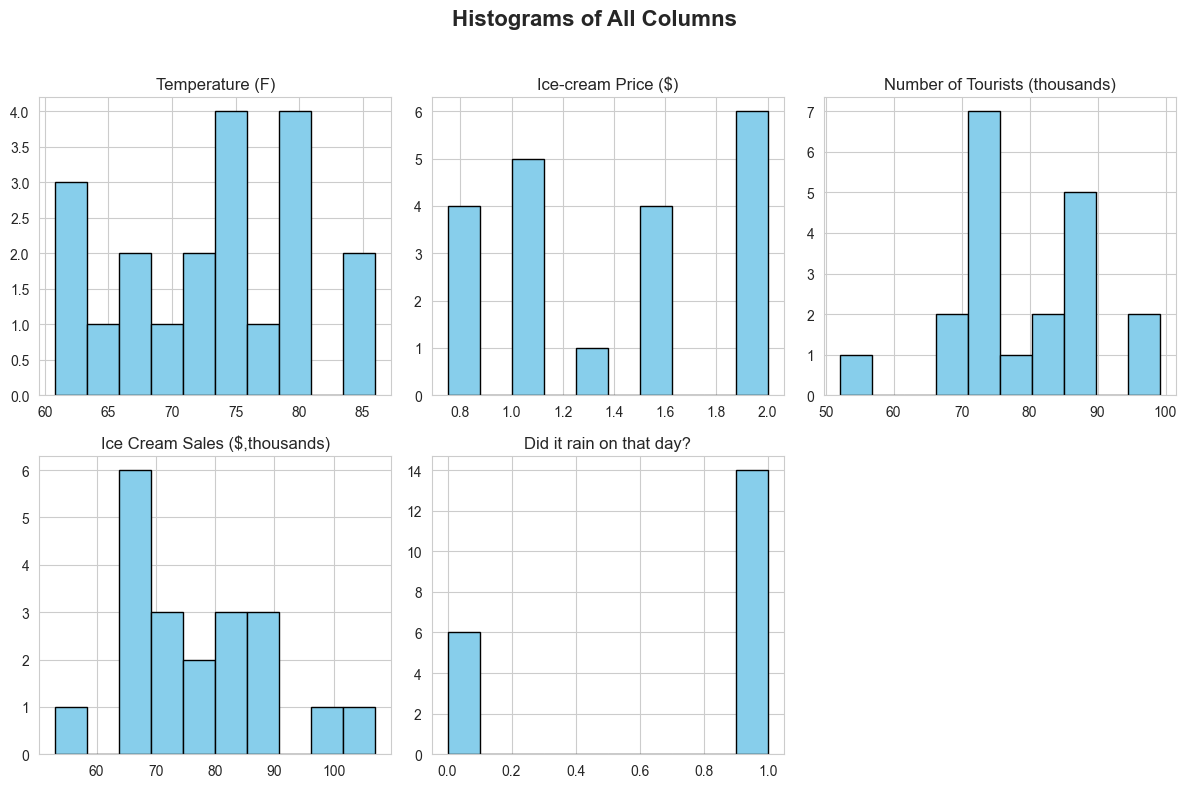

In [11]:
data.hist(figsize=(12, 8), bins=10, color='skyblue', edgecolor='black', grid=True, layout=(2, 3))
plt.suptitle("Histograms of All Columns", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

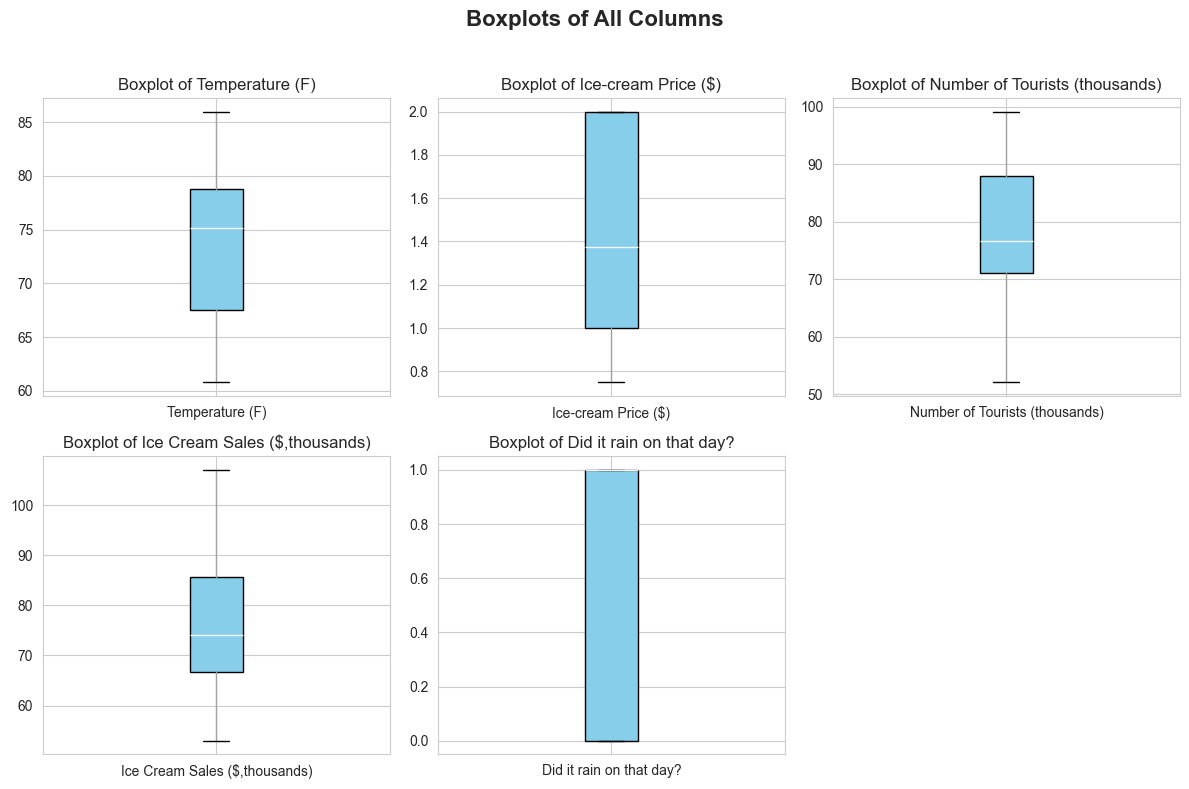

In [12]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    data.boxplot(column=column, patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f"Boxplot of {column}")

plt.suptitle("Boxplots of All Columns", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

<Axes: >

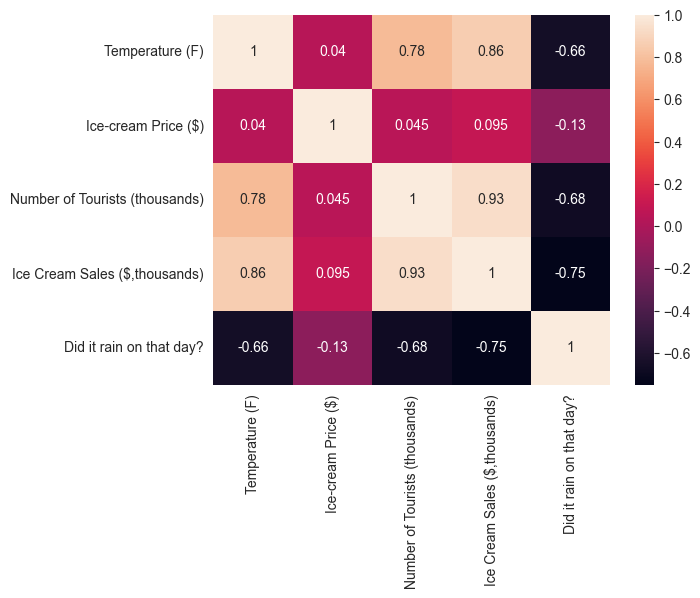

In [13]:
sns.heatmap(data.corr(),annot=True)

In [14]:
data.head(5)

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,0
1,75.2,1.0,86.4,85,0
2,86.0,2.0,99.2,107,0
3,75.2,2.0,72.4,71,1
4,60.8,2.0,71.2,65,1


# Feature Engineering

In [15]:
X = data.drop(columns=["Ice Cream Sales ($,thousands)"])
y = data["Ice Cream Sales ($,thousands)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Compile

In [17]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - loss: 0.0381 - mae: 0.1512
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0370 - mae: 0.1522
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0361 - mae: 0.1533
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0353 - mae: 0.1541
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0345 - mae: 0.1546
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0338 - mae: 0.1547
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0332 - mae: 0.1543
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0325 - mae: 0.1536
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0319 - mae: 0.1526
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0313 - mae: 0.1513
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0306 - mae: 0.1499
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0299 - mae: 0.1482
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/st

# MAE Score ,Test score and Prediction

In [18]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predictions = y_scaler.inverse_transform(predictions)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")
print("Predictions:", predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0201 - mae: 0.0839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test Loss: 0.02005862072110176, Test MAE: 0.0838748961687088
Predictions: [91.04504 98.19219 65.09891 84.52527]


# Visualize Results

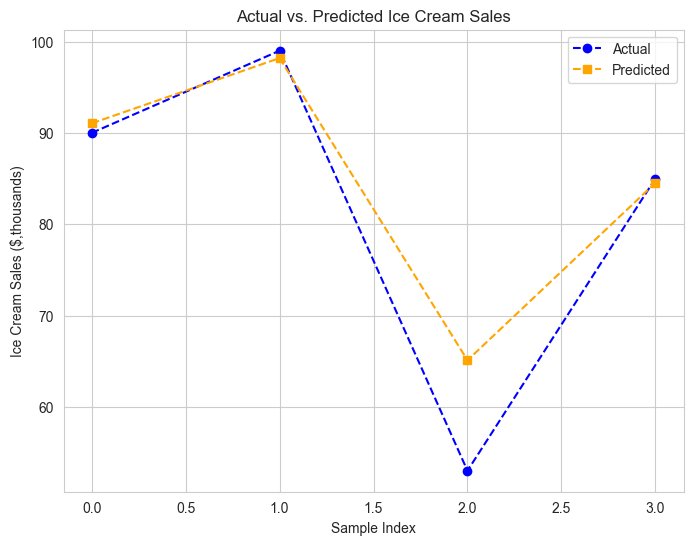

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(y_scaler.inverse_transform(y_test), marker='o', linestyle='dashed', label="Actual", color="blue")
plt.plot(predictions, marker='s', linestyle='dashed', label="Predicted", color="orange")
plt.xlabel("Sample Index")
plt.ylabel("Ice Cream Sales ($,thousands)")
plt.title("Actual vs. Predicted Ice Cream Sales")
plt.legend()
plt.show()